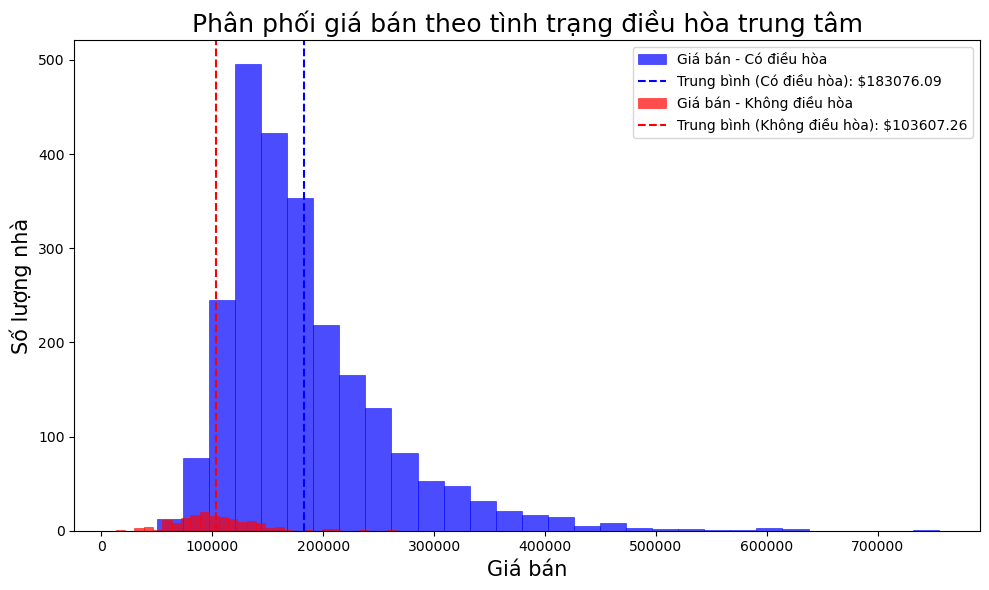

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ames = pd.read_csv('../data/Ames.csv')

# Tách dữ liệu theo điều kiện có hoặc không có điều hòa trung tâm
ac_prices = Ames[Ames['CentralAir'] == 'Y']['SalePrice']
no_ac_prices = Ames[Ames['CentralAir'] == 'N']['SalePrice']

# Thiết lập biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ histogram cho giá bán theo tình trạng điều hòa
# Vẽ dữ liệu "có điều hòa" trước để hiển thị đúng thứ tự trong chú thích
plt.hist(ac_prices, bins=30, alpha=0.7, color='blue', edgecolor='blue', lw=0.5,
         label='Giá bán - Có điều hòa')
mean_ac = np.mean(ac_prices)
plt.axvline(mean_ac, color='blue', linestyle='dashed', linewidth=1.5,
            label=f'Trung bình (Có điều hòa): ${mean_ac:.2f}')

plt.hist(no_ac_prices, bins=30, alpha=0.7, color='red', edgecolor='red', lw=0.5,
         label='Giá bán - Không điều hòa')
mean_no_ac = np.mean(no_ac_prices)
plt.axvline(mean_no_ac, color='red', linestyle='dashed', linewidth=1.5,
            label=f'Trung bình (Không điều hòa): ${mean_no_ac:.2f}')

plt.title('Phân phối giá bán theo tình trạng điều hòa trung tâm',
          fontsize=18)
plt.xlabel('Giá bán', fontsize=15)
plt.ylabel('Số lượng nhà', fontsize=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [2]:
from scipy import stats

# T-test hai mẫu, không giả định phương sai bằng nhau
t_stat, p_value = stats.ttest_ind(ac_prices, no_ac_prices, equal_var=False)

# Diễn giải kết quả
if p_value < 0.05:
    result = "Bác bỏ H0 → Có khác biệt giá bán"
else:
    result = "Không bác bỏ H0 → Không đủ bằng chứng về khác biệt"

print(f"P-value = {p_value:.5f} → {result}")

P-value = 0.00000 → Bác bỏ H0 → Có khác biệt giá bán


In [3]:
# Lấy giá bán của nhà có và không có điều hòa trung tâm
ac_prices = Ames[Ames['CentralAir'] == 'Y']['SalePrice']
no_ac_prices = Ames[Ames['CentralAir'] == 'N']['SalePrice']

# Thực hiện kiểm định t hai mẫu với giả thuyết một phía (giá có điều hòa > không điều hòa)
t_stat, p_value = stats.ttest_ind(ac_prices, no_ac_prices, equal_var=False,
                                  alternative="greater")

# In kết quả kiểm định
if p_value < 0.05:
    result = "bác bỏ giả thuyết H0"
else:
    result = "không bác bỏ giả thuyết H0"

print(f"Với p-value = {p_value:.5f}, chúng ta {result}.")

Với p-value = 0.00000, chúng ta bác bỏ giả thuyết H0.
